In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from io import StringIO
from matplotlib.patches import ConnectionPatch

In [112]:
# 2021 浙江各市 GDP
zhejiangGDPRawData = '''城市,GDP
杭州市,18109
宁波市,14594.9
温州市,7585.02
绍兴市,6795
嘉兴市,6355.28
台州市,5786.19
金华市,5355.44
湖州市,3644.9
衢州市,1875.61
丽水市,1710.03
舟山市,1703.62'''
zhejiangGDPRawData

'城市,GDP\n杭州市,18109\n宁波市,14594.9\n温州市,7585.02\n绍兴市,6795\n嘉兴市,6355.28\n台州市,5786.19\n金华市,5355.44\n湖州市,3644.9\n衢州市,1875.61\n丽水市,1710.03\n舟山市,1703.62'

In [113]:
# 2021 宁波各区县 GDP
ningboGDPRawData = '''区县,GDP
鄞州区,2500.3
北仑区,2382.5
慈溪市,2379.2
余姚市,1441.5
海曙区,1400.6
镇海区,1252.4
奉化区,848.4
宁海县,840.1
江北区,829.4
象山县,669.8'''
ningboGDPRawData

'区县,GDP\n鄞州区,2500.3\n北仑区,2382.5\n慈溪市,2379.2\n余姚市,1441.5\n海曙区,1400.6\n镇海区,1252.4\n奉化区,848.4\n宁海县,840.1\n江北区,829.4\n象山县,669.8'

In [114]:
delimiter = ','  # OP1 分隔符
fontFamily = 'KaiTi'  # OP2 字体
precision = 2  # OP3 百分比精度
textColor = '#DA4038'  # OP4 文本颜色
textSize = 'medium'  # OP5 显示字体大小 (xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller)
width = 9  # OP6 图像长度 (inch)
height = 6  # OP7 图像宽度 (inch)
dpi = 96  # OP8 DPI
pieColorSchema = 'tab20'  # OP9 pie 图颜色模式
barTarget = '宁波市'  # OP10 bar 图展示项
lineWidth = 2  # OP11 连线宽度
lineStyle = '--'  # OP12 连线样式
pieColors = None

In [115]:
plt.rcParams['font.family'] = [fontFamily] + plt.rcParams['font.family']

In [116]:
pieDf = pd.read_csv(StringIO(zhejiangGDPRawData), index_col=0, delimiter=delimiter)
pieDf

,GDP
城市,
杭州市,18109.00
宁波市,14594.90
温州市,7585.02
绍兴市,6795.00
嘉兴市,6355.28
台州市,5786.19
金华市,5355.44
湖州市,3644.90
衢州市,1875.61


In [117]:
barDf = pd.read_csv(StringIO(ningboGDPRawData), index_col=0, delimiter=delimiter)
barDf

,GDP
区县,
鄞州区,2500.3
北仑区,2382.5
慈溪市,2379.2
余姚市,1441.5
海曙区,1400.6
镇海区,1252.4
奉化区,848.4
宁海县,840.1
江北区,829.4


In [118]:
# 根据参数调整数据结构
pieDf = pieDf.reindex([barTarget] + [index for index in pieDf.index if index != barTarget])
pieDf

,GDP
城市,
宁波市,14594.90
杭州市,18109.00
温州市,7585.02
绍兴市,6795.00
嘉兴市,6355.28
台州市,5786.19
金华市,5355.44
湖州市,3644.90
衢州市,1875.61


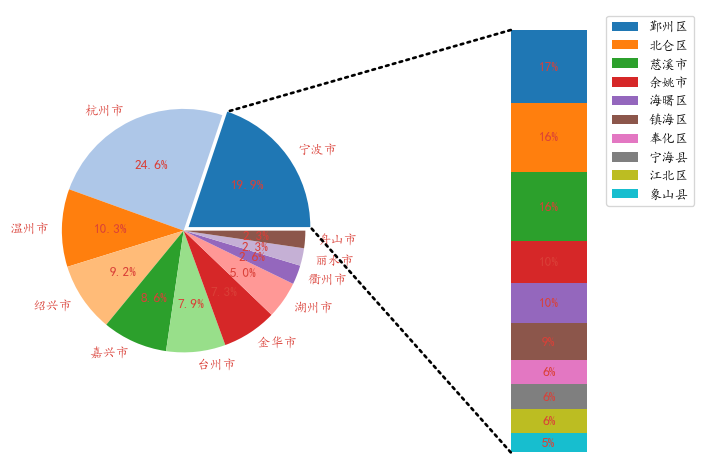

In [119]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(width, height), dpi=dpi)

# 计算 pie color
if not pieColors or len(pieColors) == 0:
    cmap = plt.cm.get_cmap(pieColorSchema)
    pieColors = [cmap(i) for i in range(len(pieDf.index))]

# 计算 explode
explode = [0.05 if indexLabel == barTarget else 0 for indexLabel in pieDf.index]

wedges, *_ = ax0.pie(pieDf[pieDf.columns[0]],
                     labels=pieDf.index,
                     textprops=dict(color=textColor),
                     autopct='%1.1f%%',
                     colors=pieColors,
                     explode=explode)

# 画 bar 图
barRatios = barDf.div(barDf.sum()).values.T[0]

barBottom, barWidth = 1, .2
for j, (barHeight, label) in enumerate(zip(barRatios, barDf.index)):
    # print(j, (barHeight, label))
    barBottom -= barHeight
    bc = ax1.bar(0, barHeight, barWidth, bottom=barBottom, label=label)
    # print(type(bc))
    ax1.bar_label(bc, labels=[f'{barHeight:.0%}'], label_type='center', color=textColor)

# print(wedges)
ax1.axis('off')
ax1.legend()
ax1.set_xlim(-barWidth*2, barWidth*2)

theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
# print(theta1, theta2, center, r)
barHeight = sum(barRatios)

x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-barWidth / 2, barHeight), coordsA=ax1.transData,
                      xyB=(x, y), coordsB=ax0.transData, linestyle=':', linewidth=lineWidth)

con.set_color([0, 0, 0])
ax1.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-barWidth / 2, 0), coordsA=ax1.transData,
                      xyB=(x, y), coordsB=ax0.transData, linestyle=':', linewidth=lineWidth)
con.set_color([0, 0, 0])
ax1.add_artist(con)

In [120]:
barDf.div(barDf.sum()).values.T[0]

array([0.17191045, 0.163811  , 0.16358411, 0.09911167, 0.09629956,
       0.08610993, 0.05833253, 0.05776186, 0.05702617, 0.04605272])

In [121]:
barDf

,GDP
区县,
鄞州区,2500.3
北仑区,2382.5
慈溪市,2379.2
余姚市,1441.5
海曙区,1400.6
镇海区,1252.4
奉化区,848.4
宁海县,840.1
江北区,829.4


In [122]:
df = pd.read_csv(StringIO(zhejiangGDPRawData), index_col=0)
df

,GDP
城市,
杭州市,18109.00
宁波市,14594.90
温州市,7585.02
绍兴市,6795.00
嘉兴市,6355.28
台州市,5786.19
金华市,5355.44
湖州市,3644.90
衢州市,1875.61


In [123]:
df.reindex(['宁波市'] + [index for index in df.index if index != '宁波市'])

,GDP
城市,
宁波市,14594.90
杭州市,18109.00
温州市,7585.02
绍兴市,6795.00
嘉兴市,6355.28
台州市,5786.19
金华市,5355.44
湖州市,3644.90
衢州市,1875.61


In [124]:
df

,GDP
城市,
杭州市,18109.00
宁波市,14594.90
温州市,7585.02
绍兴市,6795.00
嘉兴市,6355.28
台州市,5786.19
金华市,5355.44
湖州市,3644.90
衢州市,1875.61
